In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd

# import visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# modify the rows and columns
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 100)

In [2]:
# load the data
building_df = pd.read_csv('Files/Building_Permits.csv', low_memory=False)

# preview of the data
building_df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [3]:
# information about the data i.e column names, row count of each column, data type of each column
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

In [4]:
# Determine the percenage of missing values
percent_missing = (building_df.isna().sum()) / len(building_df) * 100
percent_missing = round(percent_missing, 1)

print(f"\tThe percentage of missing values:\n \n{percent_missing}")

	The percentage of missing values:
 
Permit Number                               0.0
Permit Type                                 0.0
Permit Type Definition                      0.0
Permit Creation Date                        0.0
Block                                       0.0
Lot                                         0.0
Street Number                               0.0
Street Number Suffix                       98.9
Street Name                                 0.0
Street Suffix                               1.4
Unit                                       85.2
Unit Suffix                                99.0
Description                                 0.1
Current Status                              0.0
Current Status Date                         0.0
Filed Date                                  0.0
Issued Date                                 7.5
Completed Date                             51.1
First Construction Document Date            7.5
Structural Notification                    96.5
Num

<br>

#### I'm going to keep the columns with less than 55% missing values.

In [5]:
# copy the data
df = building_df.copy()

In [6]:
not_missing = []

for idx, col in enumerate(percent_missing.index):
    if percent_missing[idx] < 55:
        not_missing.append(col)
        
not_missing

['Permit Number',
 'Permit Type',
 'Permit Type Definition',
 'Permit Creation Date',
 'Block',
 'Lot',
 'Street Number',
 'Street Name',
 'Street Suffix',
 'Description',
 'Current Status',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'Completed Date',
 'First Construction Document Date',
 'Number of Existing Stories',
 'Number of Proposed Stories',
 'Permit Expiration Date',
 'Estimated Cost',
 'Revised Cost',
 'Existing Use',
 'Existing Units',
 'Proposed Use',
 'Proposed Units',
 'Plansets',
 'Existing Construction Type',
 'Existing Construction Type Description',
 'Proposed Construction Type',
 'Proposed Construction Type Description',
 'Supervisor District',
 'Neighborhoods - Analysis Boundaries',
 'Zipcode',
 'Location',
 'Record ID']

In [7]:
df = df[not_missing]

df.sample(3, random_state=1)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
10312,201304225107,8,otc alterations permit,04/22/2013,5858,009,130,Sweeny,St,"termite report # 10153, items 1 thru 3, see at...",complete,08/16/2013,04/22/2013,04/22/2013,08/16/2013,04/22/2013,1.0,1.0,04/17/2014,7000.0,7000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,5.0,wood frame (5),5.0,wood frame (5),9.0,Portola,94134.0,"(37.73310862864415, -122.40810162622539)",1302404189410
171010,M887307,8,otc alterations permit,02/08/2018,1212,070,215,Cole,St,street space permit,issued,02/08/2018,02/08/2018,02/08/2018,NaN,02/08/2018,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.77295138711437, -122.45120688231127)",1496526490648
132673,201608054339,8,otc alterations permit,08/05/2016,6165,052,88,Mill,St,"repair chimney in-kind, no visable from street.",complete,09/12/2016,08/05/2016,08/05/2016,09/12/2016,08/05/2016,2.0,2.0,07/31/2017,5000.0,5000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,5.0,wood frame (5),5.0,wood frame (5),10.0,Visitacion Valley,94134.0,"(37.718562755595165, -122.40631055756936)",1432733197315


In [8]:
df.describe()

,Permit Type,Street Number,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
count,198900.000000,198900.000000,156116.000000,156032.000000,1.608340e+05,1.928340e+05,147362.000000,147989.000000,161591.000000,155534.000000,155738.000000,197183.000000,197184.000000,1.989000e+05
mean,7.522323,1121.728944,5.705773,5.745043,1.689554e+05,1.328562e+05,15.666164,16.510950,1.274650,4.072878,4.089529,5.538403,94115.500558,1.162048e+12
std,1.457451,1135.768948,8.613455,8.613284,3.630386e+06,3.584903e+06,74.476321,75.220444,22.407345,1.585756,1.578766,2.887041,9.270131,4.918215e+11
min,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,94102.000000,1.293532e+10
25%,8.000000,235.000000,2.000000,2.000000,3.300000e+03,1.000000e+00,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,94109.000000,1.308567e+12
50%,8.000000,710.000000,3.000000,3.000000,1.100000e+04,7.000000e+03,1.000000,2.000000,2.000000,5.000000,5.000000,6.000000,94114.000000,1.371840e+12
75%,8.000000,1700.000000,4.000000,4.000000,3.500000e+04,2.870750e+04,4.000000,4.000000,2.000000,5.000000,5.000000,8.000000,94122.000000,1.435000e+12
max,8.000000,8400.000000,78.000000,78.000000,5.379586e+08,7.805000e+08,1907.000000,1911.000000,9000.000000,5.000000,5.000000,11.000000,94158.000000,1.498342e+12


In [9]:
df.describe(include='O')

,Permit Number,Permit Type Definition,Permit Creation Date,Block,Lot,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Permit Expiration Date,Existing Use,Proposed Use,Existing Construction Type Description,Proposed Construction Type Description,Neighborhoods - Analysis Boundaries,Location
count,198900,198900,198900,198900,198900,198900,196132,198610,198900,198900,198900,183960,97191,183954,147020,157786,156461,155534,155738,197175,197200
unique,181495,8,1291,4896,1055,1704,21,134272,14,1307,1288,1289,1300,1288,2232,93,94,5,5,41,57604
top,201602179765,otc alterations permit,09/15/2017,3708,001,Market,St,street space,complete,09/15/2017,09/15/2017,06/15/2016,10/30/2015,11/07/2016,02/28/2018,1 family dwelling,1 family dwelling,wood frame (5),wood frame (5),Financial District/South Beach,"(37.79226164705184, -122.4034859571375)"
freq,101,178844,413,1195,10114,5443,138358,22163,97077,474,412,341,206,339,302,46766,46346,113350,114382,21816,554


<b>
    
* From the Data description provided, `Record ID` isn't useful for this analysis so it will be dropped.
* Other columns will also be dropped.
    
</b>

In [10]:
df = df.drop(columns=['Record ID', 'Location', 'Description', 'Permit Number', 'Filed Date'])

<b>

* `Permit Creation Date` and `Filed Date` are very similar so I'm going to drop `Filed Date`
* `Issued Date` and 'First Construction Document Date' are very similar so I'm going to drop `First Construction Document Date`.

</b>

In [11]:
df_1 = df.copy()

In [12]:
df_1 = df_1.loc[:, ['Permit Type Definition', 'Street Name', 'Permit Creation Date', 'Current Status', 
                    'Issued Date', 'Estimated Cost', 'Revised Cost', 'Plansets', 'Existing Use', 'Number of Existing Stories',
                   'Number of Proposed Stories', 'Completed Date', 'Neighborhoods - Analysis Boundaries']]
df_1.head(3)

,Permit Type Definition,Street Name,Permit Creation Date,Current Status,Issued Date,Estimated Cost,Revised Cost,Plansets,Existing Use,Number of Existing Stories,Number of Proposed Stories,Completed Date,Neighborhoods - Analysis Boundaries
0,sign - erect,Ellis,05/06/2015,expired,11/09/2015,4000.0,4000.0,2.0,tourist hotel/motel,6.0,NaN,NaN,Tenderloin
1,sign - erect,Geary,04/19/2016,issued,08/03/2017,1.0,500.0,2.0,tourist hotel/motel,7.0,NaN,NaN,Tenderloin
2,additions alterations or repairs,Pacific,05/27/2016,withdrawn,NaN,20000.0,NaN,2.0,retail sales,6.0,6.0,NaN,Russian Hill


In [13]:
# Split the data into numerical and categorical variables
cat_cols =  df_1.select_dtypes(include='O').columns
num_cols =  df_1.select_dtypes(exclude='O').columns

In [14]:
print("Frequency Table: \n")
for col in cat_cols:
    v = df_1[col].value_counts()    # value counts of each variable
    print(f"\t{col}: \n{v}")
    print("===" * 20)

Frequency Table: 

	Permit Type Definition: 
otc alterations permit                 178844
additions alterations or repairs        14663
sign - erect                             2892
new construction wood frame               950
demolitions                               600
wall or painted sign                      511
new construction                          349
grade or quarry or fill or excavate        91
Name: Permit Type Definition, dtype: int64
	Street Name: 
Market         5443
California     4587
Mission        4209
Montgomery     2403
Geary          1966
               ... 
Cooper            1
Dicha             1
Mabrey            1
Fern              1
Turk Murphy       1
Name: Street Name, Length: 1704, dtype: int64
	Permit Creation Date: 
09/15/2017    413
11/03/2015    396
02/17/2016    363
09/14/2017    335
06/27/2014    307
             ... 
05/24/2016     55
12/26/2014     45
09/11/2012     17
03/28/2012      4
12/26/2012      1
Name: Permit Creation Date, Length: 1291,

#### Convert the date columns to 'datetime' data type.

In [15]:
df_2 = df_1.copy()

dates = ['Permit Creation Date', 'Issued Date', 'Completed Date']

In [16]:
for col in dates:
    df_2[col] = pd.to_datetime(df_2[col])   # convert each colin the list to 'datetime'
        
# df_2.info()

In [17]:
df_2.head(10)

,Permit Type Definition,Street Name,Permit Creation Date,Current Status,Issued Date,Estimated Cost,Revised Cost,Plansets,Existing Use,Number of Existing Stories,Number of Proposed Stories,Completed Date,Neighborhoods - Analysis Boundaries
0,sign - erect,Ellis,2015-05-06,expired,2015-11-09,4000.0,4000.0,2.0,tourist hotel/motel,6.0,NaN,NaT,Tenderloin
1,sign - erect,Geary,2016-04-19,issued,2017-08-03,1.0,500.0,2.0,tourist hotel/motel,7.0,NaN,NaT,Tenderloin
2,additions alterations or repairs,Pacific,2016-05-27,withdrawn,NaT,20000.0,NaN,2.0,retail sales,6.0,6.0,NaT,Russian Hill
3,otc alterations permit,Pacific,2016-11-07,complete,2017-07-18,2000.0,2000.0,2.0,1 family dwelling,2.0,2.0,2017-07-24,Nob Hill
4,demolitions,Market,2016-11-28,issued,2017-12-01,100000.0,100000.0,2.0,retail sales,3.0,NaN,NaT,Tenderloin
5,otc alterations permit,Indiana,2017-06-14,issued,2017-07-06,4000.0,4000.0,2.0,apartments,5.0,5.0,NaT,Potrero Hill
6,otc alterations permit,11th,2017-06-30,complete,2017-06-30,12000.0,12000.0,0.0,apartments,3.0,3.0,2017-07-12,Inner Sunset
7,otc alterations permit,Revere,2017-06-30,issued,2017-06-30,NaN,0.0,NaN,NaN,NaN,NaN,NaT,Bayview Hunters Point
8,otc alterations permit,Fell,2017-07-05,issued,2017-07-05,NaN,1.0,NaN,NaN,NaN,NaN,NaT,Lone Mountain/USF
9,otc alterations permit,Alpine,2017-07-06,issued,2017-07-06,NaN,0.0,NaN,NaN,NaN,NaN,NaT,Haight Ashbury


In [18]:
# Time taken for the permit to be granted
df_2['PermitDuration'] = df_2['Issued Date'] - df_2['Permit Creation Date']

# Convert to string
df_2['PermitDuration'] = df_2['PermitDuration'].astype('str')

# Year permit was applied/filed
df_2['PermitAppliYear'] = df_2['Permit Creation Date'].dt.year

# Project Completed column
df_2['ProjCompleted'] = df_2['Completed Date'].apply(lambda x: 'No' if pd.isna(x) == True else 'Yes')

In [19]:
df_2.sample(8, random_state=1)

,Permit Type Definition,Street Name,Permit Creation Date,Current Status,Issued Date,Estimated Cost,Revised Cost,Plansets,Existing Use,Number of Existing Stories,Number of Proposed Stories,Completed Date,Neighborhoods - Analysis Boundaries,PermitDuration,PermitAppliYear,ProjCompleted
10312,otc alterations permit,Sweeny,2013-04-22,complete,2013-04-22,7000.0,7000.0,0.0,1 family dwelling,1.0,1.0,2013-08-16,Portola,0 days,2013,Yes
171010,otc alterations permit,Cole,2018-02-08,issued,2018-02-08,NaN,1.0,NaN,NaN,NaN,NaN,NaT,Lone Mountain/USF,0 days,2018,No
132673,otc alterations permit,Mill,2016-08-05,complete,2016-08-05,5000.0,5000.0,0.0,1 family dwelling,2.0,2.0,2016-09-12,Visitacion Valley,0 days,2016,Yes
180775,otc alterations permit,Spruce,2017-09-01,complete,2017-09-01,18000.0,18000.0,0.0,1 family dwelling,3.0,3.0,2017-11-14,Presidio Heights,0 days,2017,Yes
56947,otc alterations permit,43rd,2014-08-05,complete,2014-08-05,6000.0,6000.0,0.0,1 family dwelling,2.0,2.0,2014-08-11,Sunset/Parkside,0 days,2014,Yes
173365,otc alterations permit,Post,2016-08-01,complete,2016-08-01,17000.0,17000.0,0.0,apartments,6.0,6.0,2017-12-27,Nob Hill,0 days,2016,Yes
25807,additions alterations or repairs,Broderick,2013-09-24,reinstated,2013-10-11,2500.0,18400.0,2.0,2 family dwelling,4.0,4.0,NaT,Marina,17 days,2013,No
2346,otc alterations permit,19th,2013-01-23,issued,2013-01-23,NaN,1.0,NaN,NaN,NaN,NaN,NaT,Mission,0 days,2013,No


In [20]:
df_3 = df_2.copy()

# Add a counter
df_3['Count'] = 1

In [21]:
def project_cost(cost):
    """
    A function that determines the cost of the project.
    """
    est_cost, rev_cost = cost[0], cost[1]
    
    # if est_cost is missing return rev_cost
    if pd.isna(est_cost) :
        return rev_cost
    
    # if rev_cost is missing return est_cost
    elif pd.isna(rev_cost) :
        return est_cost
    
    # if est_cost <= rev_cost return rev_cost
    elif est_cost <= rev_cost:
        return rev_cost
    
    # if est_cost > rev_cost return est_cost
    elif est_cost > rev_cost:
        return est_cost

In [22]:
def num_of_stories(stories):
    """
    A function that determines the number of stories the project/building.
    """
    ex_stories, prop_stories = stories[0], stories[1]
    
    # if ex_stories is missing return prop_stories
    if pd.isna(ex_stories) :
        return prop_stories
    
    # if prop_stories is missing return ex_stories
    elif pd.isna(prop_stories) :
        return ex_stories
    
    # if ex_stories <= prop_stores return prop_stories
    elif ex_stories <= prop_stories:
        return prop_stories
    
    # if ex_stories > prop_stories return ex_stories
    elif ex_stories > prop_stories:
        return ex_stories

In [23]:
# Cost of the project
df_3['Project_cost'] = df_3[['Estimated Cost', 'Revised Cost']].apply(project_cost, axis='columns')

# Extract the days from the strings. (e.g 5 days == 5)
df_3['PermitDuration(Days)'] = df_3['PermitDuration'].apply(lambda x: x.split()[0])

# Replace 'NaT' with 'NaN'
df_3['PermitDuration(Days)'] = df_3['PermitDuration(Days)'].replace({'NaT': np.nan})

# Determine the number of stories
df_3['Num_of_Stories'] = df_3[['Number of Existing Stories', 'Number of Proposed Stories']]\
                                .apply(num_of_stories, axis='columns')


<br>

#### Drop the irrelevant columns

In [24]:
df_3 = df_3.drop(columns=["Estimated Cost","Revised Cost",'Plansets', 'Completed Date', 'PermitDuration', 
                          'Number of Existing Stories', 'Number of Proposed Stories'])

In [25]:
# Drop the missing values present in the column 'PermitDuration(Days)'
df_3 = df_3.dropna(subset=['PermitDuration(Days)', 'Num_of_Stories'])

# convert to integer
df_3['PermitDuration(Days)'] = pd.to_numeric(df_3['PermitDuration(Days)'])

In [26]:
# # Correct the aberrant entry
# df_3[df_3['PermitDuration(Days)'] == -1]

df_3['PermitDuration(Days)'] = np.where(df_3['PermitDuration(Days)'] == -1, 
                                        0, 
                                        df_3['PermitDuration(Days)'])

In [27]:
df_3.sample(8, random_state=1)

,Permit Type Definition,Street Name,Permit Creation Date,Current Status,Issued Date,Existing Use,Neighborhoods - Analysis Boundaries,PermitAppliYear,ProjCompleted,Count,Project_cost,PermitDuration(Days),Num_of_Stories
172542,otc alterations permit,Corbett,2016-02-11,complete,2016-04-19,apartments,Twin Peaks,2016,Yes,1,75000.0,68,4.0
76121,otc alterations permit,Summit,2015-02-18,issued,2015-02-20,vacant lot,Lakeshore,2015,No,1,1.0,2,3.0
124403,otc alterations permit,Marietta,2016-05-17,complete,2016-05-17,1 family dwelling,West of Twin Peaks,2016,Yes,1,8700.0,0,2.0
13765,otc alterations permit,Sacramento,2013-05-28,complete,2013-05-28,apartments,Nob Hill,2013,Yes,1,2400.0,0,4.0
50504,otc alterations permit,South Van Ness,2014-06-06,complete,2014-06-26,apartments,Mission,2014,Yes,1,100000.0,20,3.0
161827,otc alterations permit,Wilde,2017-05-18,complete,2017-05-18,1 family dwelling,Visitacion Valley,2017,Yes,1,2500.0,0,2.0
59991,otc alterations permit,08th,2014-09-04,complete,2014-09-04,1 family dwelling,Inner Sunset,2014,Yes,1,70000.0,0,3.0
176968,otc alterations permit,West Portal,2017-06-06,complete,2017-06-13,apartments,West of Twin Peaks,2017,Yes,1,20000.0,7,3.0


In [28]:
df_3.describe()

,PermitAppliYear,Count,Project_cost,PermitDuration(Days),Num_of_Stories
count,145934.000000,145934.0,1.459340e+05,145934.000000,145934.000000
mean,2015.066215,1.0,1.601185e+05,32.284101,5.848360
std,1.447169,0.0,3.979943e+06,101.017673,8.763416
min,2012.000000,1.0,1.000000e+00,0.000000,0.000000
25%,2014.000000,1.0,4.000000e+03,0.000000,2.000000
50%,2015.000000,1.0,1.250000e+04,0.000000,3.000000
75%,2016.000000,1.0,4.000000e+04,12.000000,4.000000
max,2018.000000,1.0,7.805000e+08,1740.000000,78.000000


In [29]:
df_3.describe(include='O')

,Permit Type Definition,Street Name,Current Status,Existing Use,Neighborhoods - Analysis Boundaries,ProjCompleted
count,145934,145934,145934,144182,144875,145934
unique,7,1655,10,93,41,2
top,otc alterations permit,Market,complete,1 family dwelling,Financial District/South Beach,Yes
freq,133081,4534,96558,43499,18780,96670


<br>

### Univariate Analysis

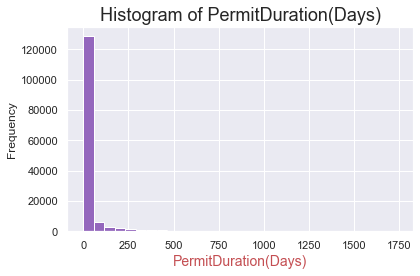

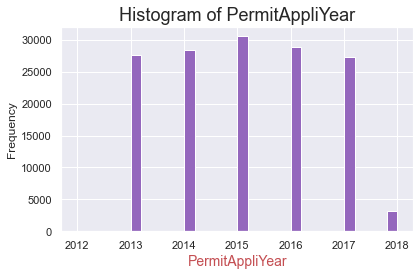

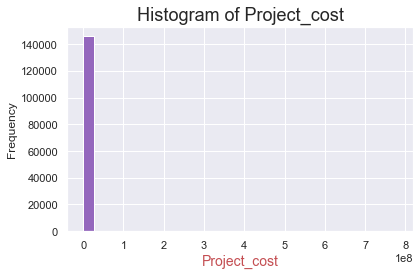

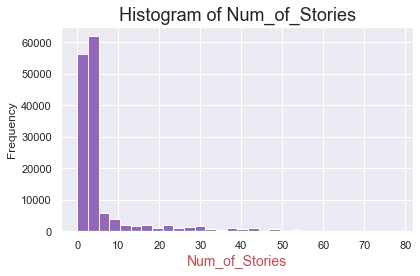

In [30]:
for col in ['PermitDuration(Days)', 'PermitAppliYear', 'Project_cost', 'Num_of_Stories']:
    chart = df_3[col].plot.hist(bins=30, color='tab:purple')
    chart.set_xlabel(col, fontsize=14, color='r')
    plt.title(f'Histogram of {col}', fontsize=18)
    plt.tight_layout()
    plt.show()

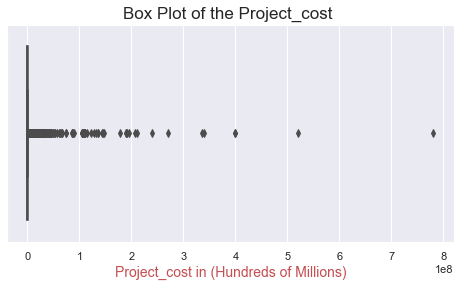

In [31]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Project_cost', data=df_3)
plt.xlabel('Project_cost in (Hundreds of Millions)', fontsize=14, color='r')
plt.title('Box Plot of the Project_cost ', fontsize=17)
plt.show()

### Observations
* **'PermitDuration(Days)':** This variable follows an exponential distribution with outliers on the right hand side of the curve.
* **'PermitAppliYear':** The distribution of this variable follows a fairly normal distribution.
* **'Project_cost':** The distribution of this variable follows an exponential distribution. The box plot shows that it contains too many outliers.
* **'Num_of_Stories':** The distribution of this variable follows an exponential distribution.

otc alterations permit              0.911926
additions alterations or repairs    0.063762
sign - erect                        0.016398
new construction wood frame         0.004118
demolitions                         0.002577
Name: Permit Type Definition, dtype: float64


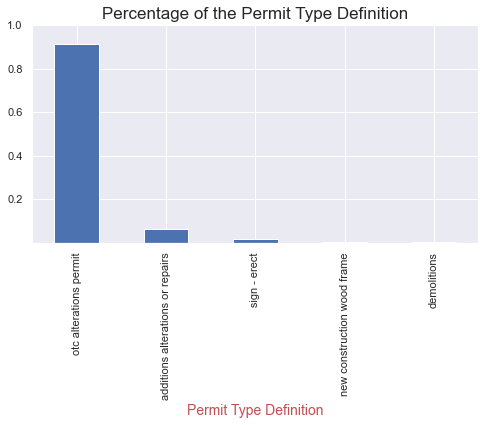

In [32]:
# Top 5 'Permit Type Definition'
a = df_3['Permit Type Definition'].value_counts(normalize=True)[:5]
print(a)

plt.figure(figsize=(8, 4))
a.plot.bar()
plt.ylim([0.001,1.0])
plt.xlabel('Permit Type Definition', fontsize=14, color='r')
plt.title('Percentage of the Permit Type Definition', fontsize=17)
plt.show()

<br>


In [33]:
# Project Completed 
a = df_3['ProjCompleted'].value_counts(normalize=True)
print(a)

Yes    0.662423
No     0.337577
Name: ProjCompleted, dtype: float64


<br>

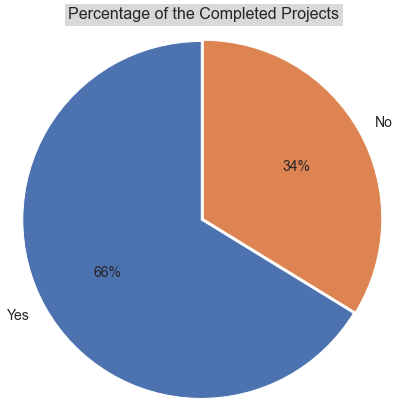

In [34]:
# make a pie chart
plt.figure(figsize=(10, 6))

plt.pie(x=a, labels=['Yes', 'No'], explode=[0.015, 0], autopct='%1.0f%%', radius=1.15, 
        textprops={'fontsize': 14}, startangle=90)
plt.title('Percentage of the Completed Projects', 
          fontsize=16, bbox={'facecolor':'0.85', 'pad':4}, y=1)

plt.tight_layout()
plt.show()

<br>


### Multivariate Analysis

<br>


**Which 'Building Permit Type' was completed the most?**

In [35]:
a = df_3[df_3['ProjCompleted'] == 'Yes']

In [36]:
# Percentage of Project Completed 
filt_df = df_3[df_3['ProjCompleted'] == 'Yes']
a = filt_df.groupby('Permit Type Definition')[['ProjCompleted']]
a = a.count().apply(lambda x: round((x / len(filt_df) * 100), 2).sort_values(ascending=False))

a = a.reset_index()
a.columns = ['Permit Type Definition', 'Percentage (%)']
a

,Permit Type Definition,Percentage (%)
0,otc alterations permit,93.35
1,additions alterations or repairs,5.12
2,sign - erect,1.00
3,new construction wood frame,0.32
4,demolitions,0.18
5,new construction,0.04


<br>

**Which 'Year' was the most permit application made?**

In [37]:
a = df_3.groupby('PermitAppliYear')[['Count']].count()
a = a.apply(lambda x: round((x / len(df_3['Count']) * 100), 2).sort_values(ascending=False))
a = a.reset_index()
a.columns = ['PermitAppliYear', 'Percentage (%)']
a

,PermitAppliYear,Percentage (%)
0,2015,20.92
1,2016,19.75
2,2014,19.47
3,2013,18.88
4,2017,18.74
5,2018,2.23
6,2012,0.01


<b> The `PermitYearHistogram` also answers this question.</b>

<br>

<br>

**Neighbourhoods with the most permit applications**

In [38]:
a = df_3.groupby('Neighborhoods - Analysis Boundaries')[['Count']].count()
a = a.apply(lambda x: round((x / len(df_3['Neighborhoods - Analysis Boundaries']) * 100), 2)\
            .sort_values(ascending=False))[:10]

a = a.reset_index()
a.columns = ['Neighborhoods - Analysis Boundaries', 'Percentage (%)']
a

,Neighborhoods - Analysis Boundaries,Percentage (%)
0,Financial District/South Beach,12.87
1,Mission,6.77
2,Sunset/Parkside,5.79
3,West of Twin Peaks,4.95
4,Castro/Upper Market,4.05
5,Outer Richmond,3.92
6,South of Market,3.89
7,Noe Valley,3.78
8,Marina,3.75
9,Pacific Heights,3.62


In [39]:
# df_3.head(3)

<br>

**What's the average time it takes for a permit application to be approved?**

In [40]:
df_3['PermitDuration(Days)'].describe(percentiles=[0.5])

count    145934.000000
mean         32.284101
std         101.017673
min           0.000000
50%           0.000000
max        1740.000000
Name: PermitDuration(Days), dtype: float64

<br>

**On average, it takes about 0 to 26 days before a permit application can be approved. The high value of the standard deviation shows that the data points are spread out over a large range of values meaning that it could infact take more than 26 days.**

In [41]:
df_4 = df_3.copy()

<br>

**Which permit application took the longest time to be approved?**

In [42]:
df_4.loc[df_4['PermitDuration(Days)'] == 1740, 
    ['Permit Creation Date',  'Neighborhoods - Analysis Boundaries', 'Issued Date','PermitDuration(Days)', 'Project_cost']]

,Permit Creation Date,Neighborhoods - Analysis Boundaries,Issued Date,PermitDuration(Days),Project_cost
171052,2013-02-07,Noe Valley,2017-11-13,1740,600000.0


<br>

**What's the most common type of 'Existing Use' for the building permits?**

In [43]:
df_4['Existing Use'].value_counts(normalize=True)[:10]

1 family dwelling       0.301695
apartments              0.253991
office                  0.160492
2 family dwelling       0.135690
retail sales            0.041725
food/beverage hndlng    0.029844
tourist hotel/motel     0.010258
vacant lot              0.009953
residential hotel       0.006457
warehouse,no frnitur    0.005347
Name: Existing Use, dtype: float64

In [44]:
df_4.head()

,Permit Type Definition,Street Name,Permit Creation Date,Current Status,Issued Date,Existing Use,Neighborhoods - Analysis Boundaries,PermitAppliYear,ProjCompleted,Count,Project_cost,PermitDuration(Days),Num_of_Stories
0,sign - erect,Ellis,2015-05-06,expired,2015-11-09,tourist hotel/motel,Tenderloin,2015,No,1,4000.0,187,6.0
1,sign - erect,Geary,2016-04-19,issued,2017-08-03,tourist hotel/motel,Tenderloin,2016,No,1,500.0,471,7.0
3,otc alterations permit,Pacific,2016-11-07,complete,2017-07-18,1 family dwelling,Nob Hill,2016,Yes,1,2000.0,253,2.0
4,demolitions,Market,2016-11-28,issued,2017-12-01,retail sales,Tenderloin,2016,No,1,100000.0,368,3.0
5,otc alterations permit,Indiana,2017-06-14,issued,2017-07-06,apartments,Potrero Hill,2017,No,1,4000.0,22,5.0
